# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

**ФИО студента: Лесниченко Макар Олегович**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для объективного сравнения различных моделей или гиперпараметров важно, чтобы все эксперименты проводились на одном и том же наборе данных и с одной и той же случайностью. Это исключает влияние случайных факторов на метрики и, следовательно, позваляет нам сравнивать модели, без чего не обойтись в образовательном процессе.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6973,Tata Nexon 1.5 Revotorq XT,2018,800000,85000,Diesel,Individual,Manual,Second Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2638,Maruti Wagon R VXI,2006,135000,62900,Petrol,Individual,Manual,First Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
4256,Maruti Swift Dzire VDI,2019,675000,25000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
5699,Maruti Swift Dzire ZDI,2018,780000,30000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
2629,Maruti Omni E MPI STD BS IV,2016,190000,80000,Petrol,Individual,Manual,Second Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
5512,Tata Indica V2 LSi,2008,85000,25000,Petrol,Individual,Manual,Second Owner,16.84 kmpl,1193 CC,64.4 bhp,99.8Nm@ 2700rpm,5.0
4885,Tata Nano Twist XE,2015,110000,15000,Petrol,Individual,Manual,First Owner,25.4 kmpl,624 CC,37.5 bhp,51Nm@ 4000+/-500rpm,4.0
1964,Maruti Omni 8 Seater BSII,2010,130000,120000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,8.0
2343,Ford EcoSport 1.5 Ti VCT AT Titanium BSIV,2015,775000,30000,Petrol,Individual,Automatic,First Owner,15.63 kmpl,1499 CC,110.4 bhp,140Nm@ 4400rpm,5.0
5179,Mahindra TUV 300 T8,2017,700000,40000,Diesel,Individual,Manual,First Owner,18.49 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0


In [5]:
df_test.head(-1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Maruti Swift Dzire VXi,2010,240000,143000,Petrol,Individual,Manual,First Owner,17.5 kmpl,1298 CC,85.8 bhp,114Nm@ 4000rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


**Колонки, в которых есть (как в трейне, так и в тесте) пропущенные значения:**

*   mileage
*   engine
* max_power
* torque
* seats



In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


Количество дубликатов в датасете:

In [8]:
df_train.duplicated().sum()

985

In [9]:
df_test.duplicated().sum()

62

Убираем дубликаты

In [11]:
df_train = df_train.drop_duplicates()


In [12]:
df_test = df_test.drop_duplicates()

Проверяем, что они децствительно удалились

In [13]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


Строим дашборд, используя *ydata-profilling*

In [14]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e8cd3d6124fdedd90c5bff9e68cdca4c05461a2e057839201f0f3647aec91ccd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [15]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

In [16]:
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

**Для того, чтобы заполнить пропуски медианами, нужно привести столбцы 8-12 к числовому виду.**

In [22]:
df_train['mileage'] = df_train['mileage'].str.extract('(\d+\.?\d*)').astype(float)
df_test['mileage'] = df_test['mileage'].str.extract('(\d+\.?\d*)').astype(float)

In [23]:
df_train['engine'] = df_train['engine'].str.extract('(\d+\.?\d*)').astype(float)
df_test['engine'] = df_test['engine'].str.extract('(\d+\.?\d*)').astype(float)

In [24]:
df_train['max_power'] = df_train['max_power'].str.extract('(\d+\.?\d*)').astype(float)
df_test['max_power'] = df_test['max_power'].str.extract('(\d+\.?\d*)').astype(float)

In [25]:
df_train['torque'] = df_train['torque'].str.extract('(\d+\.?\d*)').astype(float)
df_test['torque'] = df_test['torque'].str.extract('(\d+\.?\d*)').astype(float)

In [33]:
columns_to_fill = df_train.columns[8:13]

train_medians = df_train[columns_to_fill].median()

df_train[columns_to_fill] = df_train[columns_to_fill].fillna(train_medians)

df_test[columns_to_fill] = df_test[columns_to_fill].fillna(train_medians)


Проверяем, что пропусков больше нет

In [34]:
df_train[columns_to_fill].isnull().sum().sum()

0

In [35]:
df_test[columns_to_fill].isnull().sum().sum()

0

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [38]:
X_t = df_train.columns.drop('selling_price')
duplicates = df_train.duplicated(subset=X_t)
print(f'Количество таких дубликатов: {duplicates.sum()}')

Количество таких дубликатов: 174


In [40]:
df_train[duplicates].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.8,114.0,5.0
370,BMW X4 M Sport X xDrive20d,2019,5400000,7500,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.0,400.0,5.0
444,Maruti Alto 800 VXI,2016,270000,50000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.3,69.0,5.0
766,Chevrolet Beat Diesel LT,2012,200000,70000,Diesel,Individual,Manual,Second Owner,25.44,936.0,57.6,150.0,5.0
1000,Maruti Alto LXI,2005,80000,40000,Petrol,Individual,Manual,Second Owner,19.70,796.0,46.3,62.0,5.0


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6014 entries, 0 to 6996
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6014 non-null   object 
 1   year           6014 non-null   int64  
 2   selling_price  6014 non-null   int64  
 3   km_driven      6014 non-null   int64  
 4   fuel           6014 non-null   object 
 5   seller_type    6014 non-null   object 
 6   transmission   6014 non-null   object 
 7   owner          6014 non-null   object 
 8   mileage        6014 non-null   float64
 9   engine         6014 non-null   float64
 10  max_power      6014 non-null   float64
 11  torque         6014 non-null   float64
 12  seats          6014 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 786.8+ KB


In [42]:
df_train = df_train.drop_duplicates(subset=X_t, keep='first')

In [44]:
df_train.reset_index(drop=True, inplace=True)

In [45]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [47]:
df_train.drop(columns='torque', inplace=True)
df_test.drop(columns='torque', inplace=True)

<ipython-input-47-b405ab2d77a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns='torque', inplace=True)


**Прим.:** Единицы измерения были убраны выше

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [51]:
t_columns = ['engine', 'seats']

df_train.loc[:, t_columns] = df_train[t_columns].astype(int)
df_test.loc[:, t_columns] = df_test[t_columns].astype(int)

Проверка:

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [53]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.433070,1429.448973,87.905426,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.985958,485.662834,31.640599,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [54]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,938.000000,9.380000e+02,938.000000,938.000000,938.000000,938.000000,938.000000
mean,2013.522388,5.496642e+05,72733.968017,19.395405,1434.134328,88.508785,5.408316
std,4.038242,5.967333e+05,48749.355940,3.986526,514.623041,32.640119,0.923207
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,4.000000
25%,2011.000000,2.500000e+05,38862.750000,16.505000,1197.000000,68.050000,5.000000
50%,2014.000000,4.200000e+05,65000.000000,19.440000,1248.000000,81.860000,5.000000
75%,2017.000000,6.500000e+05,100000.000000,22.320000,1498.000000,100.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,9.000000


In [55]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [56]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,938,938,938,938,938
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,502,820,845,566


In [57]:
assert df_train.shape == (5840, 13) #почему 13 столбцов? мы же удалили один столбец (torque). должно бьть (5840, 12)

AssertionError: 

In [58]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

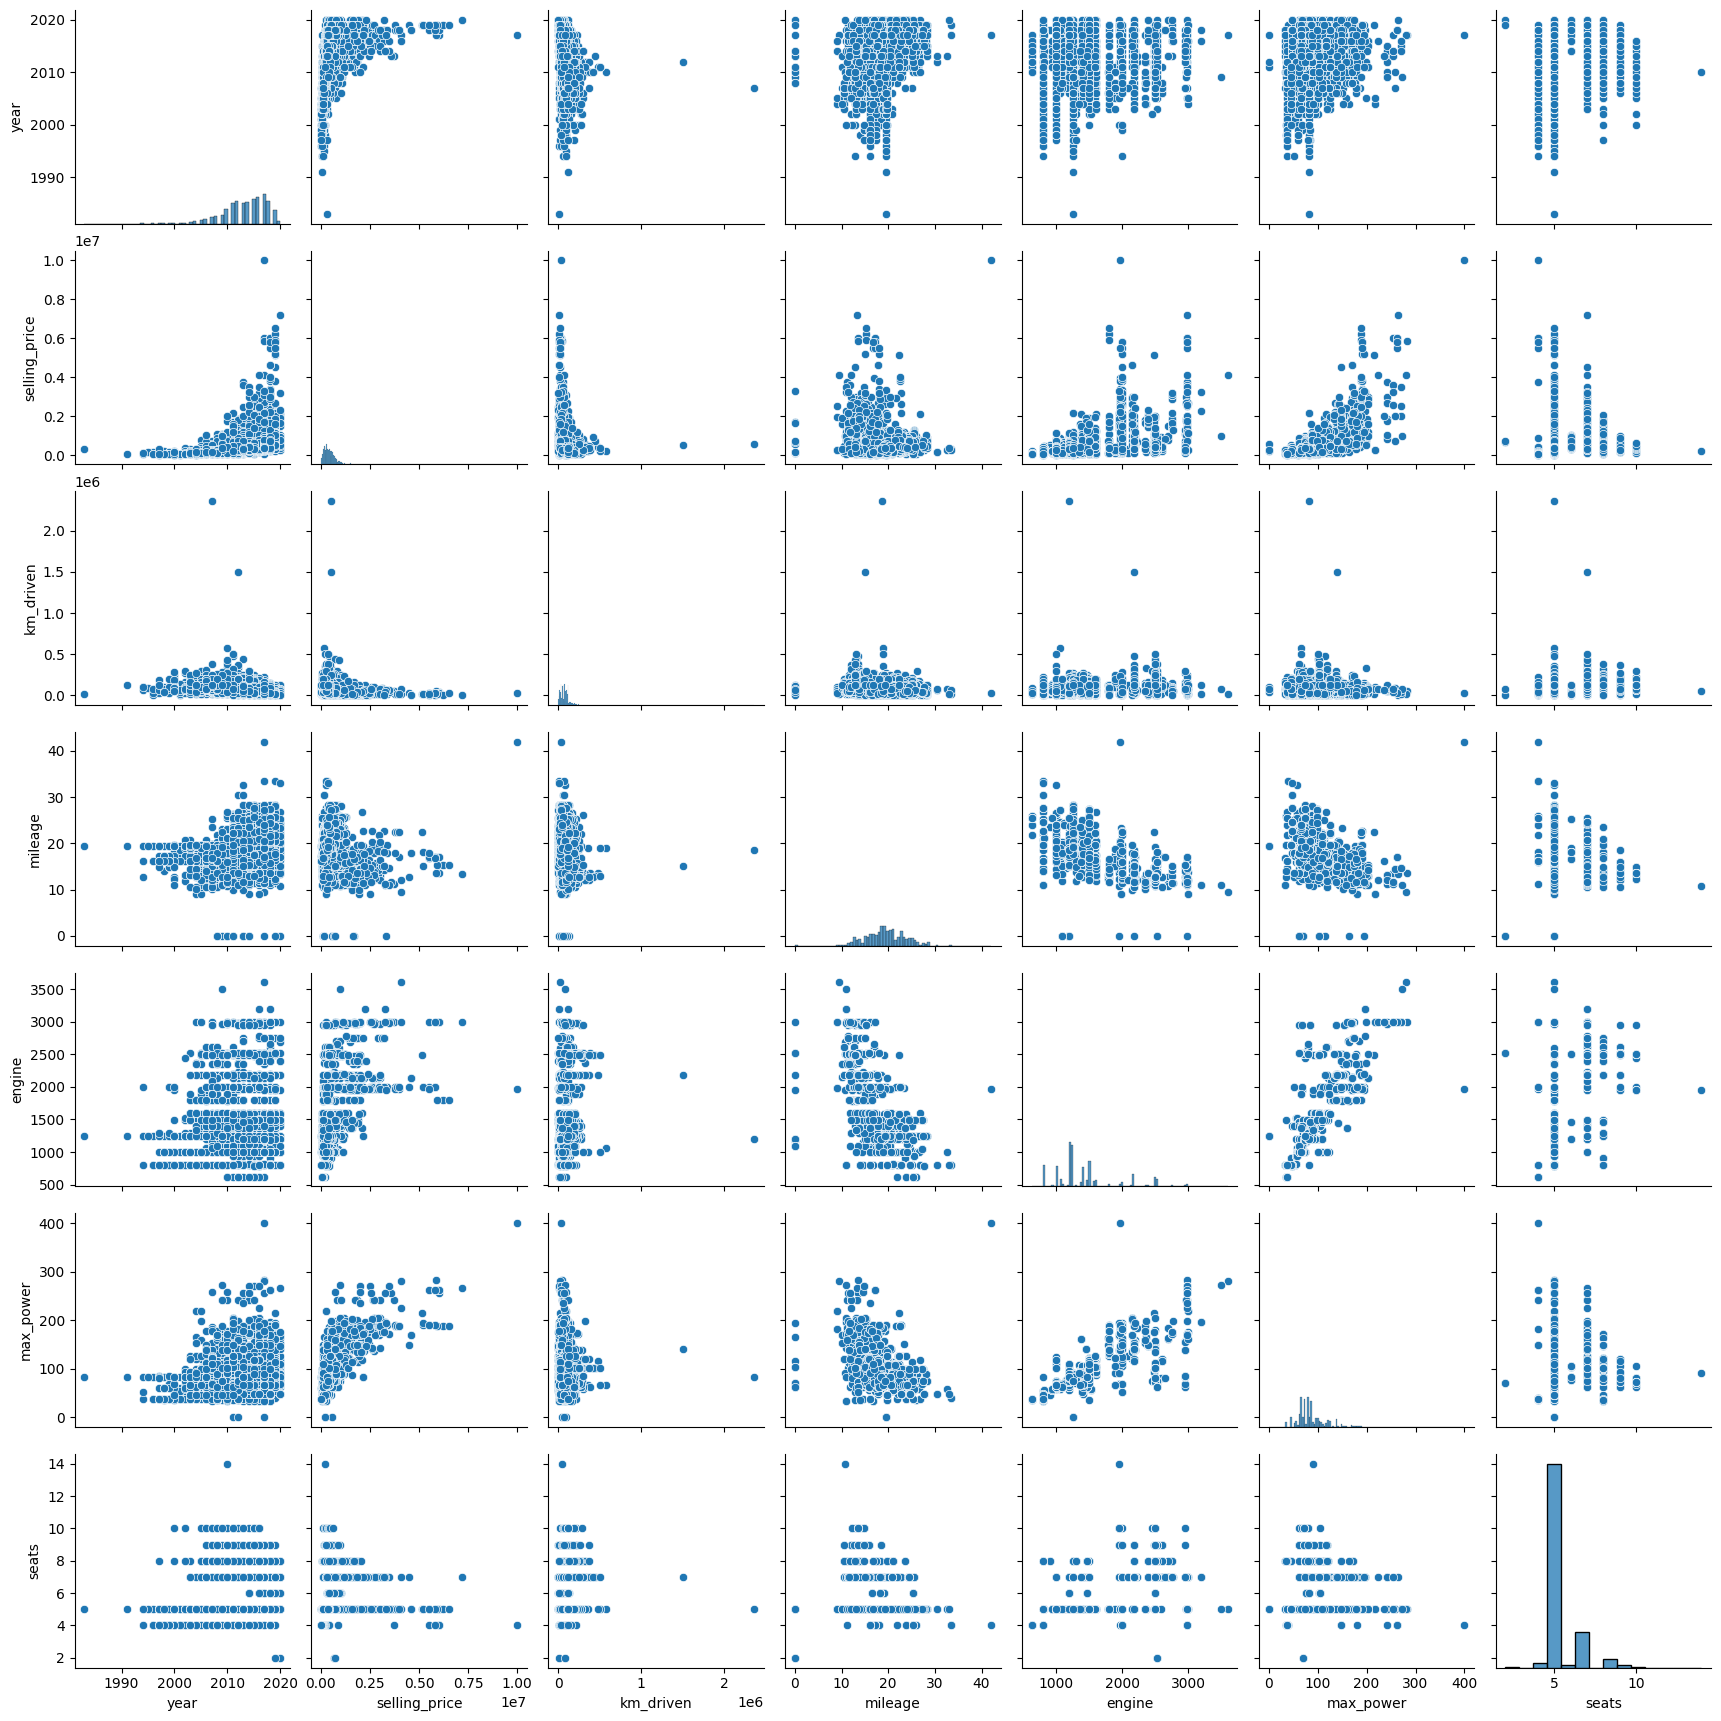

In [59]:
numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_train[numeric_columns])

plt.show()

**6.1.1** Из явных наблюдений видно, что целевая переменная (цена) зависит от года выпуска, от мощности и от двигателя.

**6.1.2** Прослеживается четкая корреляция целевой переменной с годом выпуска. прим.: я немного нечестно поступил и посмотрел карту корреляций в дашборде, который сделал выше. Тем не менее, корреляция цены и года выпуска очевидно по вышестоящему графику и логике автомобильного рынка.

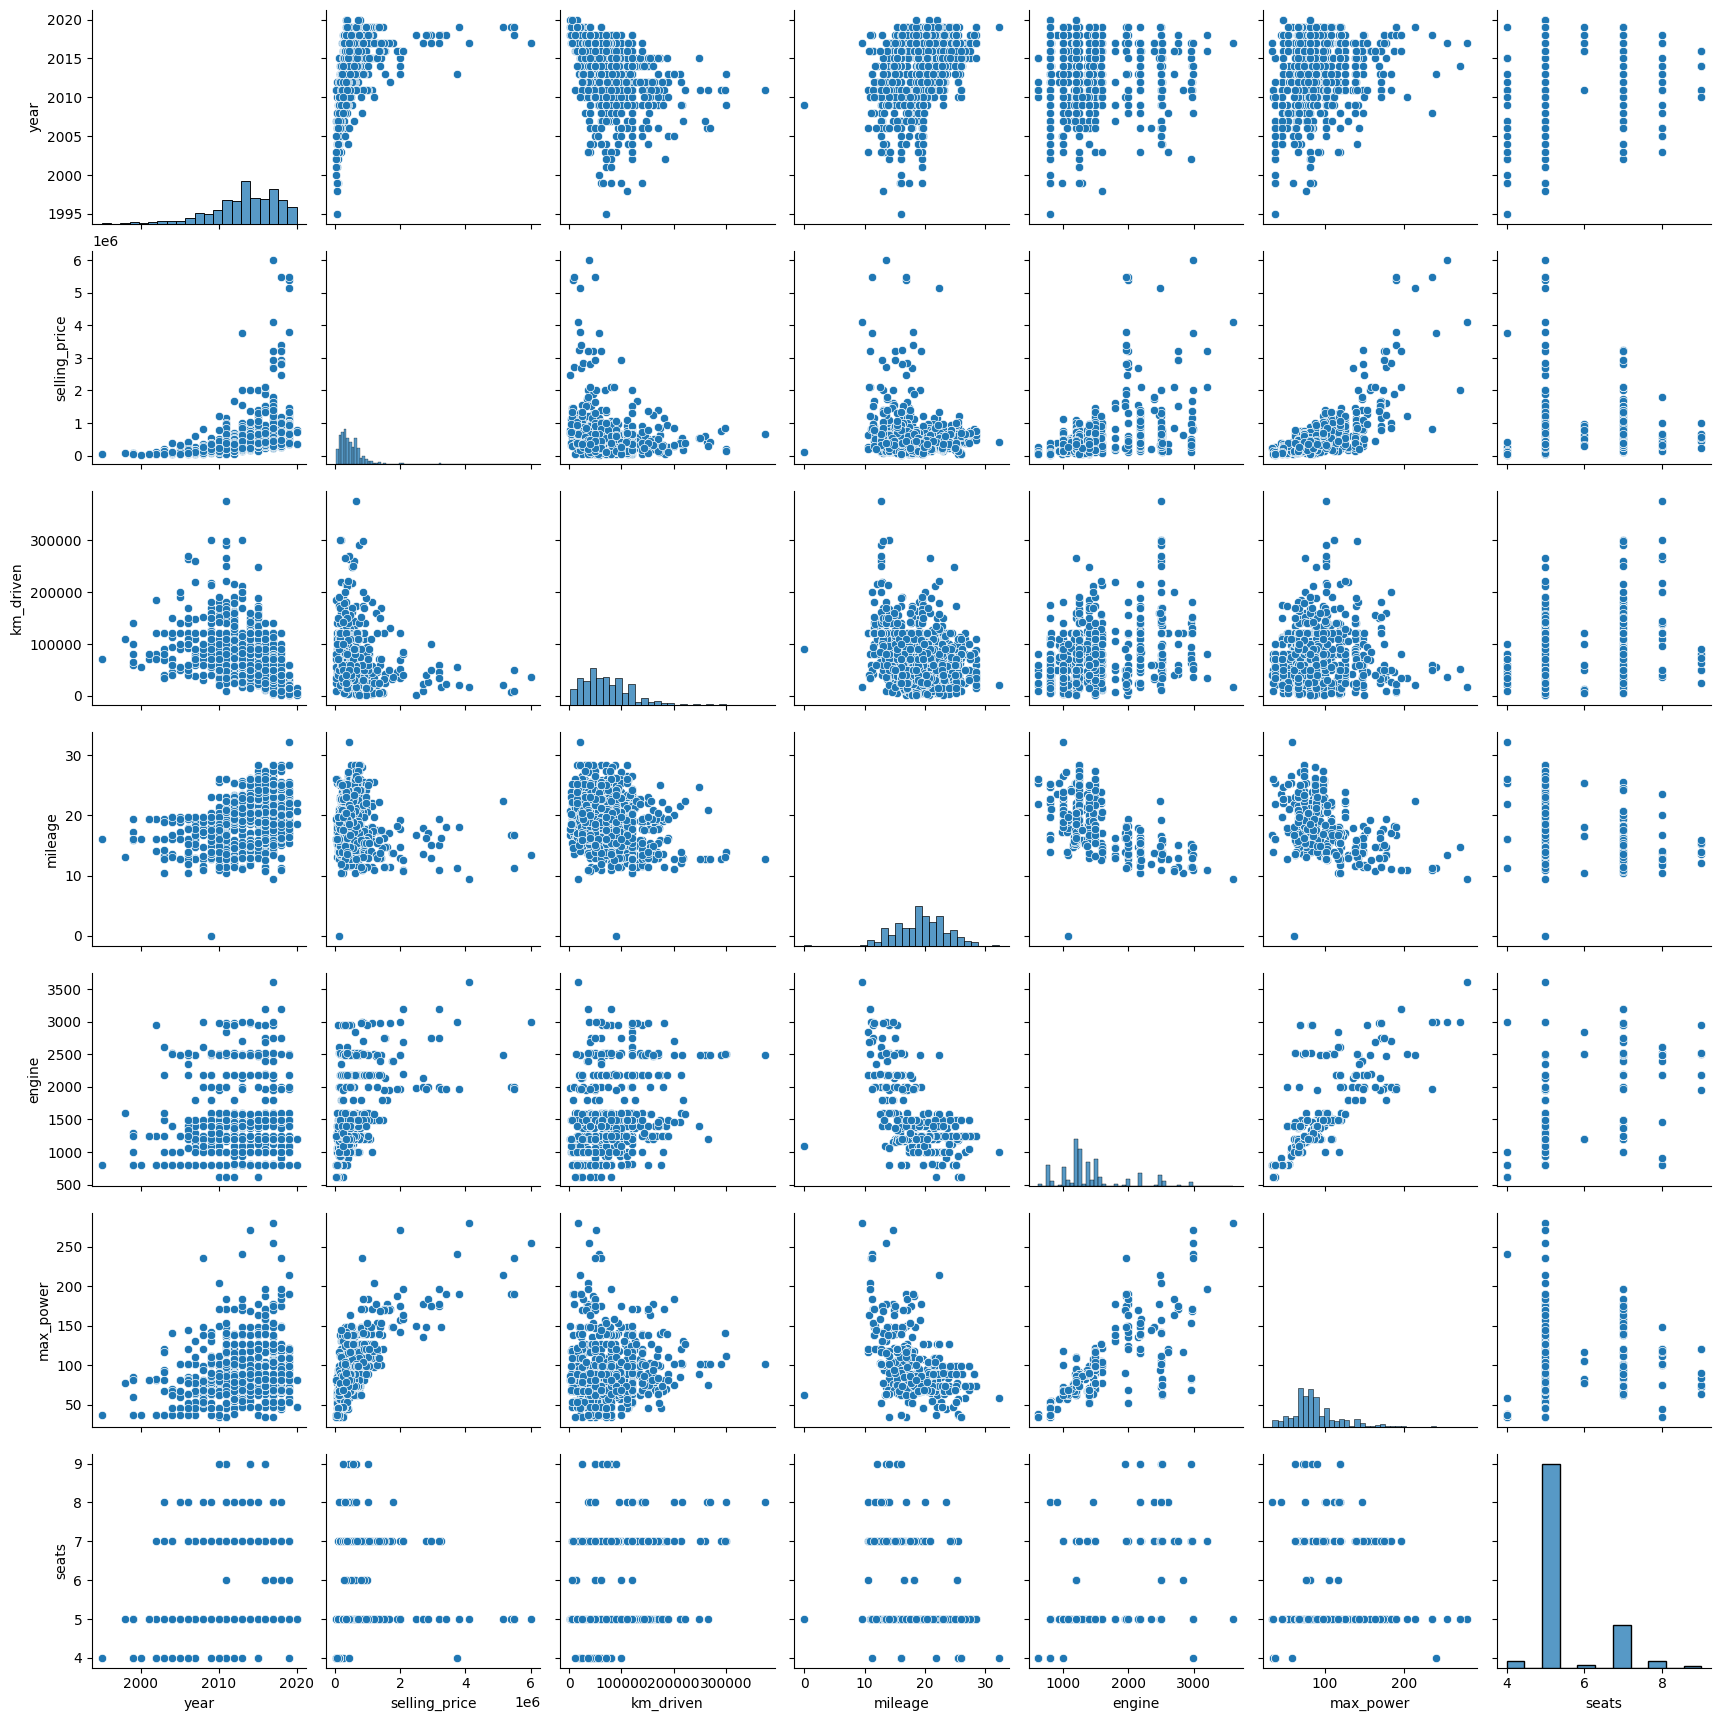

In [60]:
numeric_columns = df_test.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_test[numeric_columns])

plt.show()

**6.1.2** В целом да - похожи. Я каких-то явных аномалий не заметил

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

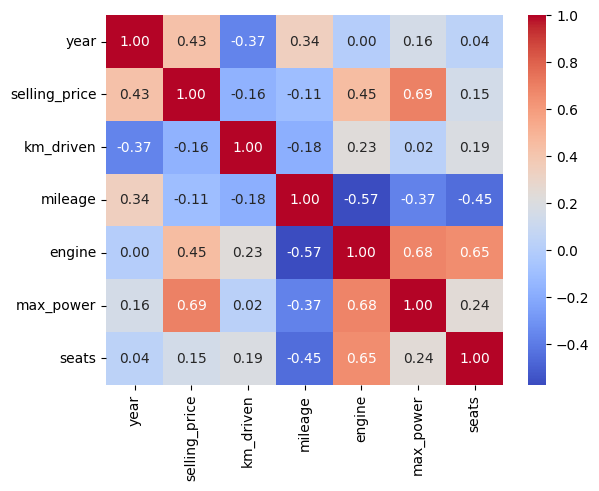

In [71]:
num_df_train = df_train.select_dtypes(include=['int64', 'float64'])
corr = num_df_train.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?


1.   engine и year
2.   max_power и selling_price, max_power и engine, engine и seats
3.  да, видно, что корреляция составляет -0,37



### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

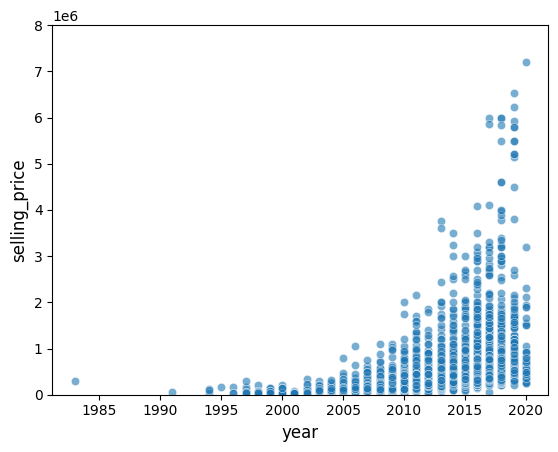

In [95]:
fig, ax = plt.subplots()
sns.scatterplot(data=df_train, x='year', y='selling_price', alpha=0.6, ax=ax)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('selling_price', fontsize=12)

ax.set_ylim(0, 0.8e7)

plt.show()

По графику видна явная зависимость цены от года выпска.

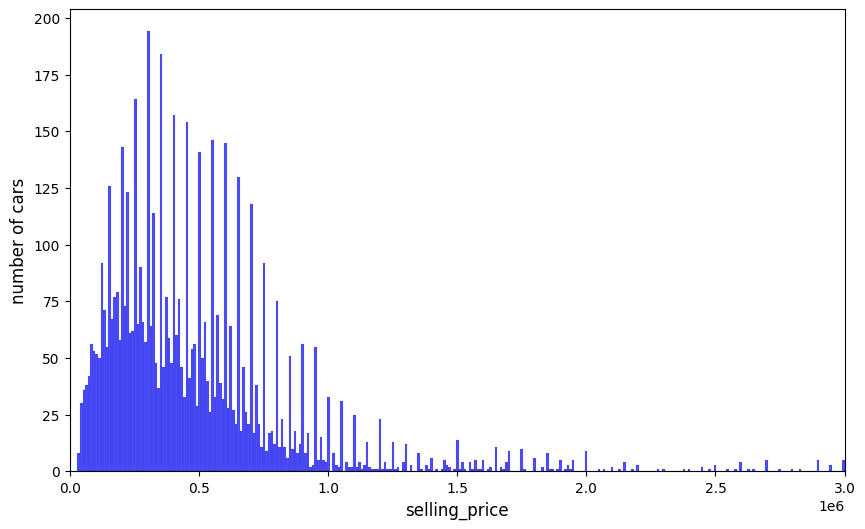

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['selling_price'], bins=1000, color='blue', alpha=0.7)

plt.xlabel('selling_price', fontsize=12)
plt.ylabel('number of cars', fontsize=12)

plt.xlim(0, 0.3e7)

plt.show()

Данный график помогает нам понять, в каком ценовом диапозоне находятся большая часть машин. Как видно из графика, абсолютное большинство машин стоит меньше 100000.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [129]:
df_train_numeric = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]
df_test_numeric = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

In [130]:
y_train = df_train['selling_price']
X_train = df_train_numeric

In [131]:
assert X_train.shape == (5840, 6)

In [132]:
y_test = df_test['selling_price']
X_test = df_test_numeric

In [134]:
#assert X_test.shape == (1000, 6)
#а почему 1000? нам же надо было удалить дубликаты в тесте (или не нужно было... но в любом случае хранить дубликаты в тесте не имеет смысла)

In [133]:
assert X_test.shape == (938, 6) #это я от себя добавил

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"R2 для тренировочных данных: {train_r2:.4f}")
print(f"R2 для тестовых данных: {test_r2:.4f}")
print(f"MSE для тренировочных данных: {train_mse:.2f}")
print(f"MSE для тестовых данных: {test_mse:.2f}")

R2 для тренировочных данных: 0.5923
R2 для тестовых данных: 0.6155
MSE для тренировочных данных: 116873522067.38
MSE для тестовых данных: 136772167127.85


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(f"R2 для стандартизированных тренировочных данных: {train_r2:.4f}")
print(f"R2 для стандартизированных тестовых данных: {test_r2:.4f}")
print(f"MSE для стандартизированных тренировочных данных: {train_mse:.2f}")
print(f"MSE для стандартизированных тестовых данных: {test_mse:.2f}")



R2 для стандартизированных тренировочных данных: 0.5923
R2 для стандартизированных тестовых данных: 0.6155
MSE для стандартизированных тренировочных данных: 116873522067.38
MSE для стандартизированных тестовых данных: 136772167127.85


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [148]:
coef = model.coef_

coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coef})

coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)

In [149]:
coef_df

,Feature,Coefficient,abs_coefficient
4,max_power,322810.624194,322810.624194
0,year,152769.523820,152769.523820
3,engine,61194.067365,61194.067365
1,km_driven,-44160.912287,44160.912287
2,mileage,28866.511286,28866.511286
5,seats,-23201.375730,23201.375730


Признак max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [151]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)

print(f"R2 для тренировочных данных (Lasso): {train_r2_lasso:.4f}")
print(f"R2 для тестовых данных (Lasso): {test_r2_lasso:.4f}")
print(f"MSE для тренировочных данных (Lasso): {train_mse_lasso:.2f}")
print(f"MSE для тестовых данных (Lasso): {test_mse_lasso:.2f}")

R2 для тренировочных данных (Lasso): 0.5923
R2 для тестовых данных (Lasso): 0.6155
MSE для тренировочных данных (Lasso): 116873522077.50
MSE для тестовых данных (Lasso): 136772324492.07


LASSO почти не улучишла, но и не ухудшила модель.

In [154]:
lasso_coefficients = lasso_model.coef_
zero_coefficients = np.sum(lasso_coefficients == 0)

print(zero_coefficients)
print(lasso_coefficients)

0
[152769.34124769 -44159.78396416  28864.62904793  61189.23533765
 322811.50816311 -23198.4991645 ]


Ни один коэффициент не был занулен. Это связано с тем, что в нашей модели нет признаков, которые слабо влияют на целевую переменную.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [156]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lasso = Lasso()

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10, scoring='r2', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

y_test_pred_best = best_model.predict(X_test_scaled)

test_r2_best = r2_score(y_test, y_test_pred_best)
test_mse_best = MSE(y_test, y_test_pred_best)

print(f"Лучший параметр alpha: {best_params['alpha']}")
print(f"R2 на кросс-валидации (Lasso): {best_score:.4f}")
print(f"R2 на тестовых данных: {test_r2_best:.4f}")
print(f"MSE на тестовых данных: {test_mse_best:.2f}")

Лучший параметр alpha: 1000
R2 на кросс-валидации (Lasso): 0.5689
R2 на тестовых данных: 0.6150
MSE на тестовых данных: 136939166328.02


In [159]:
lasso_coefficients_best = best_model.coef_
zero_coefficients_best = np.sum(lasso_coefficients_best == 0)
print(f"Количество зануленных коэффициентов: {zero_coefficients_best}")


Количество зануленных коэффициентов: 0


Сколько грид-сёрчу пришлось обучать моделей? Ответ: 70
Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации? Ответы: Нет, не занулились. 1000

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [162]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

elastic_net = ElasticNet()

grid_search_en = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1
)

grid_search_en.fit(X_train_scaled, y_train)

best_params_en = grid_search_en.best_params_
best_model_en = grid_search_en.best_estimator_
best_score_en = grid_search_en.best_score_

y_test_pred_en = best_model_en.predict(X_test_scaled)

test_r2_en = r2_score(y_test, y_test_pred_en)
test_mse_en = MSE(y_test, y_test_pred_en)

num_models_trained_en = len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10

print(f"Количество обученных моделей: {num_models_trained_en}")
print(f"Лучшие гиперпараметры: {best_params_en}")
print(f"R2 на кросс-валидации (ElasticNet): {best_score_en:.4f}")
print(f"R2 на тестовых данных: {test_r2_en:.4f}")
print(f"MSE на тестовых данных: {test_mse_en:.2f}")

Количество обученных моделей: 360
Лучшие гиперпараметры: {'alpha': 1, 'l1_ratio': 0.9}
R2 на кросс-валидации (ElasticNet): 0.5761
R2 на тестовых данных: 0.6039
MSE на тестовых данных: 140879831121.33


Сколько грид-сёрчу пришлось обучать моделей? Ответ: 360

Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей? Ответ: 'alpha': 1, 'l1_ratio': 0.9



# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [164]:
#df_train_copy = df_train.copy()
#df_test_copy = df_test.copy()

In [176]:
df_train.drop('name', axis=1, inplace=True)
df_test.drop('name', axis=1, inplace=True)

<ipython-input-176-9bee6ff292a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('name', axis=1, inplace=True)


In [177]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5840 non-null   int64  
 1   selling_price  5840 non-null   int64  
 2   km_driven      5840 non-null   int64  
 3   fuel           5840 non-null   object 
 4   seller_type    5840 non-null   object 
 5   transmission   5840 non-null   object 
 6   owner          5840 non-null   object 
 7   mileage        5840 non-null   float64
 8   engine         5840 non-null   int64  
 9   max_power      5840 non-null   float64
 10  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 502.0+ KB


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [168]:
#assert X_train_cat.shape == (5840, 10) #почему здесь 10 строк? у нас же было 13 строк изначально, 1 мы удалили (torque), осталось 12. даже, если считать name удаленным, то получается 11.

In [174]:
df_train_cat = df_train.copy()
df_test_cat = df_test.copy()

In [175]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [185]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

encoder = OneHotEncoder()

encoded_train = encoder.fit_transform(df_train[categorical_features])
encoded_test = encoder.transform(df_test[categorical_features])

encoded_columns = encoder.get_feature_names_out(categorical_features)

df_train_encoded = pd.DataFrame(encoded_train.toarray(), columns=encoded_columns)
df_test_encoded = pd.DataFrame(encoded_test.toarray(), columns=encoded_columns)

df_train_encoded = pd.concat([df_train.drop(columns=categorical_features), df_train_encoded], axis=1)
df_test_encoded = pd.concat([df_test.drop(columns=categorical_features), df_test_encoded], axis=1)


In [211]:
df_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 936
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          938 non-null    float64
 1   selling_price                 938 non-null    float64
 2   km_driven                     938 non-null    float64
 3   mileage                       938 non-null    float64
 4   engine                        938 non-null    float64
 5   max_power                     938 non-null    float64
 6   fuel_CNG                      938 non-null    float64
 7   fuel_Diesel                   938 non-null    float64
 8   fuel_LPG                      938 non-null    float64
 9   fuel_Petrol                   938 non-null    float64
 10  seller_type_Dealer            938 non-null    float64
 11  seller_type_Individual        938 non-null    float64
 12  seller_type_Trustmark Dealer  938 non-null    float64
 13  transmissi

In [212]:
y_train = df_train_encoded['selling_price']
X_train = df_train_encoded.drop('selling_price', axis=1)

y_test = df_test_encoded['selling_price']
X_test = df_test_encoded.drop('selling_price', axis=1)

In [237]:
X_test = X_test.dropna()
y_test = y_test.dropna()

In [238]:
y_test = y_test.iloc[:X_test.shape[0]]

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [241]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

ridge = Ridge()

grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1
)

grid_search_ridge.fit(X_train, y_train)

best_model_ridge = grid_search_ridge.best_estimator_
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

y_test_pred_ridge = best_model_ridge.predict(X_test)

test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

num_models_trained = len(param_grid['alpha']) * 10

print(f"Количество обученных моделей: {num_models_trained}")
print(f"Лучший параметр alpha: {best_params_ridge['alpha']}")
print(f"R2 на кросс-валидации (Ridge): {best_score_ridge:.4f}")
print(f"R2 на тестовых данных: {test_r2_ridge:.4f}")
print(f"MSE на тестовых данных: {test_mse_ridge:.2f}")

Количество обученных моделей: 60
Лучший параметр alpha: 10
R2 на кросс-валидации (Ridge): 0.6213
R2 на тестовых данных: 0.5651
MSE на тестовых данных: 156550583097.04


Да, удалось

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [251]:
def business_metric(y_true, y_pred):
    error = np.abs((y_pred - y_true) / y_true)

    error_10 = np.sum(error <= 0.1)
    return f'{(error_10 / len(y_true)) * 100:.2f}%'



In [258]:
#1)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

ridge = Ridge()

grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1
)

grid_search_ridge.fit(X_train, y_train)

best_model_ridge = grid_search_ridge.best_estimator_
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

y_test_pred_ridge = best_model_ridge.predict(X_test)

test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)

print(business_metric(y_test, y_test_pred_ridge))

#2)
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(business_metric(y_test, y_test_pred))

#3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = MSE(y_train, y_train_pred)
test_mse = MSE(y_test, y_test_pred)

print(business_metric(y_test, y_test_pred))

22.41%
22.53%
22.41%


`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

